In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedStratifiedKFold, train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve, precision_score, recall_score, precision_recall_curve
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
pd.set_option('display.max_columns', None)

In [ ]:
from IPython.display import display

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/datasets/DATASET NBA/NBAGAMES.csv", sep='\t')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (58,64,65,68,79,93,96,114) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df.describe()

,GAME_ID,SEASON_ID,TEAM_ID_HOME,MIN_HOME,FGM_HOME,FGA_HOME,FG_PCT_HOME,FG3M_HOME,FG3A_HOME,FG3_PCT_HOME,FTM_HOME,FTA_HOME,FT_PCT_HOME,OREB_HOME,DREB_HOME,REB_HOME,AST_HOME,STL_HOME,BLK_HOME,TOV_HOME,PF_HOME,PTS_HOME,PLUS_MINUS_HOME,VIDEO_AVAILABLE_HOME,TEAM_ID_AWAY,MIN_AWAY,FGM_AWAY,FGA_AWAY,FG_PCT_AWAY,FG3M_AWAY,FG3A_AWAY,FG3_PCT_AWAY,FTM_AWAY,FTA_AWAY,FT_PCT_AWAY,OREB_AWAY,DREB_AWAY,REB_AWAY,AST_AWAY,STL_AWAY,BLK_AWAY,TOV_AWAY,PF_AWAY,PTS_AWAY,PLUS_MINUS_AWAY,VIDEO_AVAILABLE_AWAY,GAME_SEQUENCE,GAME_STATUS_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,LIVE_PERIOD,WH_STATUS,PTS_PAINT_HOME,PTS_2ND_CHANCE_HOME,PTS_FB_HOME,LARGEST_LEAD_HOME,LEAD_CHANGES_HOME,TIMES_TIED_HOME,TEAM_TURNOVERS_HOME,TOTAL_TURNOVERS_HOME,TEAM_REBOUNDS_HOME,PTS_OFF_TO_HOME,PTS_PAINT_AWAY,PTS_2ND_CHANCE_AWAY,PTS_FB_AWAY,LARGEST_LEAD_AWAY,LEAD_CHANGES_AWAY,TIMES_TIED_AWAY,TEAM_TURNOVERS_AWAY,TOTAL_TURNOVERS_AWAY,TEAM_REBOUNDS_AWAY,PTS_OFF_TO_AWAY,LEAGUE_ID,ATTENDANCE,PTS_QTR1_HOME,PTS_QTR2_HOME,PTS_QTR3_HOME,PTS_QTR4_HOME,PTS_OT1_HOME,PTS_OT2_HOME,PTS_OT3_HOME,PTS_OT4_HOME,PTS_OT5_HOME,PTS_OT6_HOME,PTS_OT7_HOME,PTS_OT8_HOME,PTS_OT9_HOME,PTS_OT10_HOME,PTS_HOME_y,PTS_QTR1_AWAY,PTS_QTR2_AWAY,PTS_QTR3_AWAY,PTS_QTR4_AWAY,PTS_OT1_AWAY,PTS_OT2_AWAY,PTS_OT3_AWAY,PTS_OT4_AWAY,PTS_OT5_AWAY,PTS_OT6_AWAY,PTS_OT7_AWAY,PTS_OT8_AWAY,PTS_OT9_AWAY,PTS_OT10_AWAY,LAST_GAME_ID,LAST_GAME_HOME_TEAM_ID,LAST_GAME_HOME_TEAM_POINTS,LAST_GAME_VISITOR_TEAM_ID,LAST_GAME_VISITOR_TEAM_POINTS,HOME_TEAM_WINS,HOME_TEAM_LOSSES,VIDEO_AVAILABLE_FLAG,PT_AVAILABLE,PT_XYZ_AVAILABLE,HUSTLE_STATUS,HISTORICAL_STATUS
count,6.244800e+04,62448.000000,6.244800e+04,62448.000000,62430.000000,44586.000000,44548.000000,46791.000000,41527.000000,41142.000000,62427.000000,59412.000000,59409.000000,41240.000000,41171.000000,44340.000000,44204.000000,41323.000000,41532.000000,41503.000000,59512.000000,62448.000000,62448.000000,62448.000000,6.244800e+04,62448.000000,62433.000000,44587.000000,44550.000000,46791.000000,41527.000000,41240.000000,62433.000000,59415.000000,59414.000000,41240.000000,41172.000000,44344.000000,44207.000000,41323.000000,41533.000000,41502.000000,59519.000000,62448.000000,62448.000000,62448.000000,31318.000000,62448.000000,6.244800e+04,6.244800e+04,62448.000000,62448.000000,62015.0,29393.000000,29393.000000,29393.000000,29393.000000,29393.000000,29393.000000,29393.000000,29292.000000,27318.000000,27022.000000,29393.000000,29393.000000,29393.000000,29393.000000,29393.000000,29393.000000,29393.000000,29292.000000,27318.000000,27022.000000,29393.0,56323.000000,61237.000000,61231.000000,61192.000000,61189.000000,31075.000000,29629.000000,29421.000000,29391.000000,10750.000000,10749.0,10749.0,10749.0,10749.0,10749.0,61950.000000,61241.000000,61231.000000,61192.000000,61193.000000,31075.000000,29629.000000,29421.000000,29391.000000,10750.000000,10749.0,10749.0,10749.0,10749.0,10749.0,6.178100e+04,6.178100e+04,61781.000000,6.178100e+04,61781.000000,62379.000000,62379.000000,62379.000000,62379.000000,62379.00000,62379.000000,62379.000000
mean,2.513506e+07,21991.655874,1.610613e+09,218.888147,39.956816,83.900305,0.467941,5.321152,16.547018,0.346580,20.841479,27.359153,0.754420,12.228952,31.214690,43.733897,23.946498,8.007720,5.351151,14.779606,22.464293,104.744011,3.704250,0.173632,1.610613e+09,218.887715,38.591242,83.669545,0.455125,5.237076,16.614010,0.336367,19.937998,26.262644,0.751627,11.795926,30.019139,42.052408,22.071346,7.865474,4.695784,15.192521,23.175490,101.039761,-3.704250,0.173632,4.434000,2.995692,1.610613e+09,1.610613e+09,1991.655874,4.057696,1.0,42.301160,13.514816,13.634063,13.119756,6.346919,5.355289,0.606165,14.434794,8.470130,14.739879,40.287143,13.067771,12.217501,9.872351,6.344810,5.353962,0.642364,14.737812,8.436049,15.478129,0.0,14543.309359,26.472019,26.036534,26.067362,25.985030,1.169204,0.164940,0.025424,0.009765,0.001581,0.0,0.0,0.0,0.0,0.0,104.716868,25.215656,25.027192,25.153435,25.506627,1.123733,0.161497,0.023861,0.009152,0.001488,0.0,0.0,0.0,0.0,0.0,2.522089e+07,1.6106

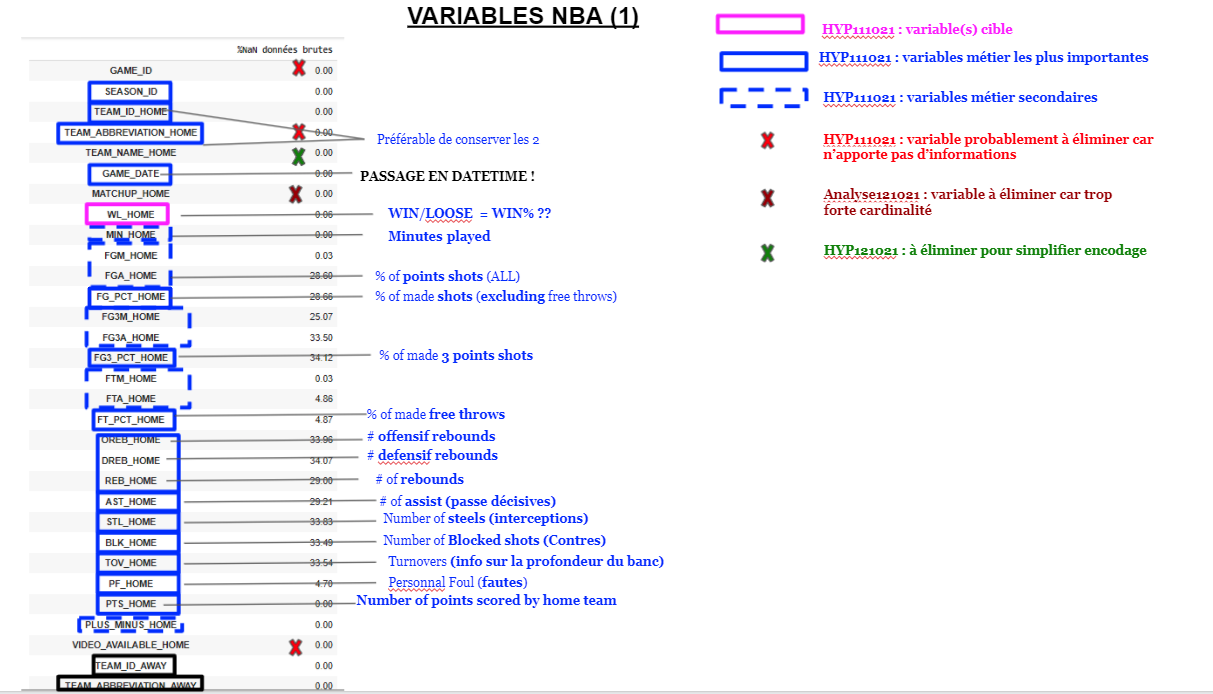

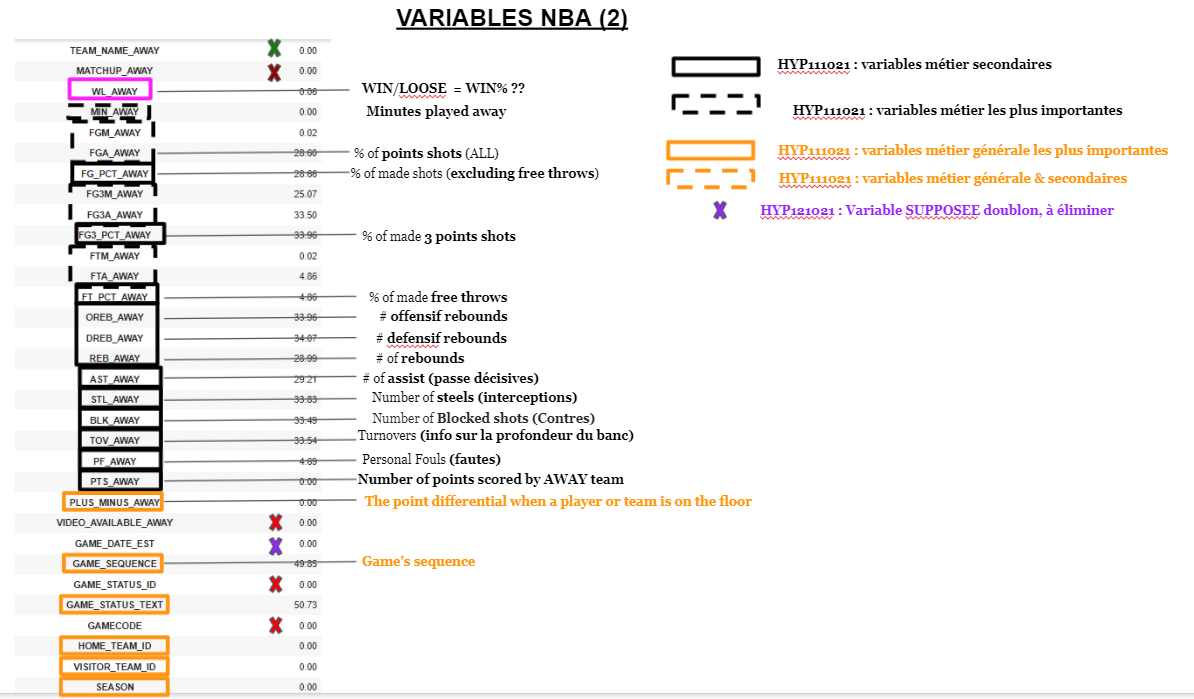

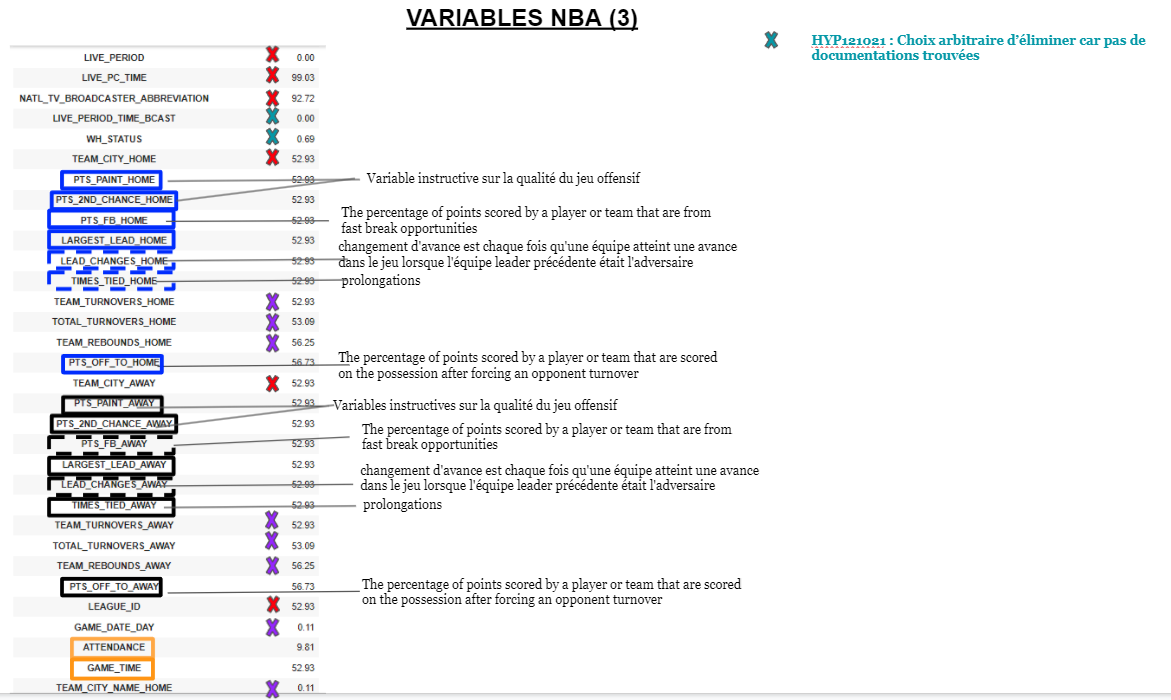

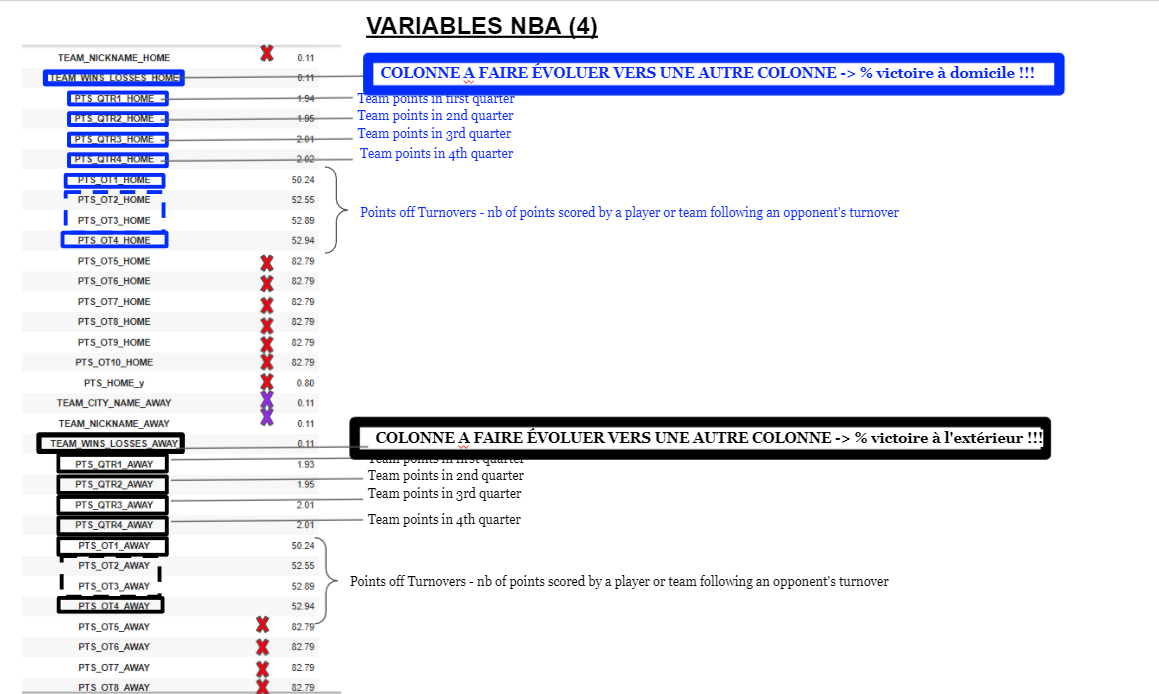

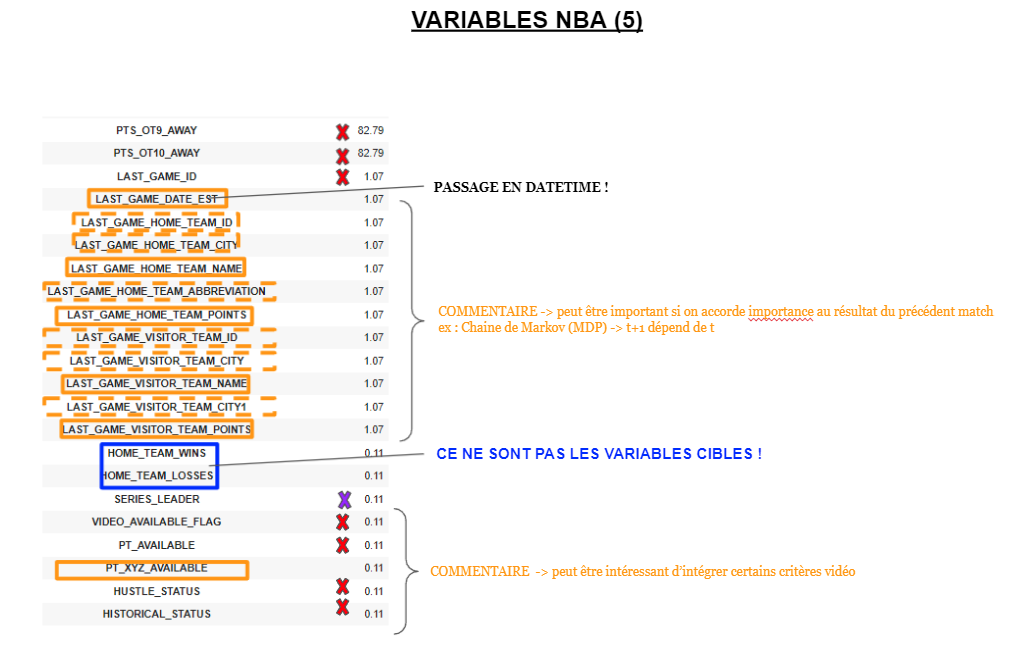

In [ ]:
df.sample(10)

,GAME_ID,SEASON_ID,TEAM_ID_HOME,TEAM_ABBREVIATION_HOME,TEAM_NAME_HOME,GAME_DATE,MATCHUP_HOME,WL_HOME,MIN_HOME,FGM_HOME,FGA_HOME,FG_PCT_HOME,FG3M_HOME,FG3A_HOME,FG3_PCT_HOME,FTM_HOME,FTA_HOME,FT_PCT_HOME,OREB_HOME,DREB_HOME,REB_HOME,AST_HOME,STL_HOME,BLK_HOME,TOV_HOME,PF_HOME,PTS_HOME,PLUS_MINUS_HOME,VIDEO_AVAILABLE_HOME,TEAM_ID_AWAY,TEAM_ABBREVIATION_AWAY,TEAM_NAME_AWAY,MATCHUP_AWAY,WL_AWAY,MIN_AWAY,FGM_AWAY,FGA_AWAY,FG_PCT_AWAY,FG3M_AWAY,FG3A_AWAY,FG3_PCT_AWAY,FTM_AWAY,FTA_AWAY,FT_PCT_AWAY,OREB_AWAY,DREB_AWAY,REB_AWAY,AST_AWAY,STL_AWAY,BLK_AWAY,TOV_AWAY,PF_AWAY,PTS_AWAY,PLUS_MINUS_AWAY,VIDEO_AVAILABLE_AWAY,GAME_DATE_EST,GAME_SEQUENCE,GAME_STATUS_ID,GAME_STATUS_TEXT,GAMECODE,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,LIVE_PERIOD,LIVE_PC_TIME,NATL_TV_BROADCASTER_ABBREVIATION,LIVE_PERIOD_TIME_BCAST,WH_STATUS,TEAM_CITY_HOME,PTS_PAINT_HOME,PTS_2ND_CHANCE_HOME,PTS_FB_HOME,LARGEST_LEAD_HOME,LEAD_CHANGES_HOME,TIMES_TIED_HOME,TEAM_TURNOVERS_HOME,TOTAL_TURNOVERS_HOME,TEAM_REBOUNDS_HOME,PTS_OFF_TO_HOME,TEAM_CITY_AWAY,PTS_PAINT_AWAY,PTS_2ND_CHANCE_AWAY,PTS_FB_AWAY,LARGEST_LEAD_AWAY,LEAD_CHANGES_AWAY,TIMES_TIED_AWAY,TEAM_TURNOVERS_AWAY,TOTAL_TURNOVERS_AWAY,TEAM_REBOUNDS_AWAY,PTS_OFF_TO_AWAY,LEAGUE_ID,GAME_DATE_DAY,ATTENDANCE,GAME_TIME,TEAM_CITY_NAME_HOME,TEAM_NICKNAME_HOME,TEAM_WINS_LOSSES_HOME,PTS_QTR1_HOME,PTS_QTR2_HOME,PTS_QTR3_HOME,PTS_QTR4_HOME,PTS_OT1_HOME,PTS_OT2_HOME,PTS_OT3_HOME,PTS_OT4_HOME,PTS_OT5_HOME,PTS_OT6_HOME,PTS_OT7_HOME,PTS_OT8_HOME,PTS_OT9_HOME,PTS_OT10_HOME,PTS_HOME_y,TEAM_CITY_NAME_AWAY,TEAM_NICKNAME_AWAY,TEAM_WINS_LOSSES_AWAY,PTS_QTR1_AWAY,PTS_QTR2_AWAY,PTS_QTR3_AWAY,PTS_QTR4_AWAY,PTS_OT1_AWAY,PTS_OT2_AWAY,PTS_OT3_AWAY,PTS_OT4_AWAY,PTS_OT5_AWAY,PTS_OT6_AWAY,PTS_OT7_AWAY,PTS_OT8_AWAY,PTS_OT9_AWAY,PTS_OT10_AWAY,LAST_GAME_ID,LAST_GAME_DATE_EST,LAST_GAME_HOME_TEAM_ID,LAST_GAME_HOME_TEAM_CITY,LAST_GAME_HOME_TEAM_NAME,LAST_GAME_HOME_TEAM_ABBREVIATION,LAST_GAME_HOME_TEAM_POINTS,LAST_GAME_VISITOR_TEAM_ID,LAST_GAME_VISITOR_TEAM_CITY,LAST_GAME_VISITOR_TEAM_NAME,LAST_GAME_VISITOR_TEAM_CITY1,LAST_GAME_VISITOR_TEAM_POINTS,HOME_TEAM_WINS,HOME_TEAM_LOSSES,SERIES_LEADER,VIDEO_AVAILABLE_FLAG,PT_AVAILABLE,PT_XYZ_AVAILABLE,HUSTLE_STATUS,HISTORICAL_STATUS
54201,21400055,22014,1610612757,POR,Portland Trail Blazers,2014-11-04,POR vs. CLE,W,240,37.0,75.0,0.493,8.0,25.0,0.320,19.0,25.0,0.760,9.0,39.0,48.0,21.0,7.0,4.0,12.0,20.0,101,19,1,1610612739,CLE,Cleveland Cavaliers,CLE @ POR,L,240,31.0,85.0,0.365,9.0,21.0,0.429,11.0,14.0,0.786,13.0,28.0,41.0,18.0,5.0,3.0,14.0,19.0,82,-19,1,2014-11-04T00:00:00,7.0,3,Final,20141104/CLEPOR,1610612757,1610612739,2014,4.0,NaN,NBA TV,Q4 - NBA TV,1.0,Portland,38.0,13.0,10.0,21.0,16.0,8.0,1.0,12.0,5.0,11.0,Cleveland,32.0,15.0,9.0,7.0,16.0,8.0,0.0,14.0,7.0,16.0,0.0,"TUESDAY, NOVEMBER 4, 2014",19441.0,2:10,Portland,Trail Blazers,2-2,31.0,24.0,21.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101.0,Cleveland,Cavaliers,1-2,34.0,16.0,19.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21300575.0,2014-01-15T00:00:00,1.610613e+09,Portland,Trail Blazers,POR,108.0,1.610613e+09,Cleveland,Cavaliers,CLE,96.0,1.0,1.0,Tied,1.0,1.0,1.0,0.0,0.0
19556,28300143,21983,1610612749,MIL,Milwaukee Bucks,1983-11-23,MIL vs. GOS,W,240,47.0,97.0,0.485,0.0,NaN,NaN,24.0,26.0,0.923,NaN,NaN,48.0,34.0,NaN,NaN,NaN,23.0,118,24,0,1610612744,GOS,Golden State Warriors,GOS @ MIL,L,240,37.0,98.0,0.378,0.0,NaN,NaN,20.0,25.0,0.800,NaN,NaN,45.0,19.0,NaN,NaN,NaN,23.0,94,-24,0,1983-11-23T00:00:00,NaN,3,NaN,19831123/GOSMIL,1610612749,1610612744,1983,4.0,NaN,NaN,Q4 -,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"WEDNESDAY, NOVEMBER 23, 1983",8795.0,NaN,Milwaukee,Bucks,-0,22.0,32.0,27.0,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,118.0,Golden State,Warriors,-0,24.0,23.0,21.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28200508.0,1983-01-29T00:00:00,1.610613e+09,Milwaukee,Bucks,MIL,102.0,1.610613e+09,Golden State,Warriors,GOS,110.0,2.0,0.0,Milwaukee,0.0,0.0,0.0,0.0,1.0
21869,28500564,21985,1610612764,WAS,Washingt

In [ ]:
# columns to drop 
df = df.drop(['GAME_ID','TEAM_NAME_HOME','MATCHUP_HOME','FGM_HOME','FGA_HOME','FG3M_HOME','FG3A_HOME','FTM_HOME','FTA_HOME','PLUS_MINUS_HOME','VIDEO_AVAILABLE_HOME','TEAM_NAME_AWAY',
'MATCHUP_AWAY','MIN_AWAY','FGM_AWAY','FGA_AWAY','FG3M_AWAY','FG3A_AWAY','FTM_AWAY','FTA_AWAY','VIDEO_AVAILABLE_AWAY','GAME_STATUS_ID','GAMECODE','LIVE_PERIOD','LIVE_PC_TIME','NATL_TV_BROADCASTER_ABBREVIATION',
'LIVE_PERIOD_TIME_BCAST','WH_STATUS','TEAM_CITY_HOME','LEAD_CHANGES_HOME','TIMES_TIED_HOME','TEAM_TURNOVERS_HOME','TOTAL_TURNOVERS_HOME','TEAM_REBOUNDS_HOME','TEAM_CITY_AWAY','PTS_FB_AWAY','LEAD_CHANGES_AWAY',
'TEAM_TURNOVERS_AWAY','TOTAL_TURNOVERS_AWAY','TEAM_REBOUNDS_AWAY','LEAGUE_ID','GAME_DATE_DAY','TEAM_CITY_NAME_HOME','TEAM_NICKNAME_HOME','PTS_OT2_HOME','PTS_OT3_HOME','PTS_OT5_HOME','PTS_OT6_HOME','PTS_OT7_HOME',
'PTS_OT8_HOME','PTS_OT9_HOME','PTS_OT10_HOME','PTS_HOME_y', 'TEAM_CITY_NAME_AWAY','TEAM_NICKNAME_AWAY','PTS_OT2_AWAY','PTS_OT3_AWAY','PTS_OT5_AWAY','PTS_OT6_AWAY','PTS_OT7_AWAY','PTS_OT8_AWAY','PTS_OT9_AWAY',
'PTS_OT10_AWAY','LAST_GAME_ID','LAST_GAME_HOME_TEAM_ID','LAST_GAME_HOME_TEAM_CITY','LAST_GAME_HOME_TEAM_ABBREVIATION','LAST_GAME_VISITOR_TEAM_ID','LAST_GAME_VISITOR_TEAM_CITY','LAST_GAME_VISITOR_TEAM_CITY1','SERIES_LEADER',
'VIDEO_AVAILABLE_FLAG','PT_AVAILABLE','HUSTLE_STATUS','HISTORICAL_STATUS','GAME_DATE_EST',"LAST_GAME_HOME_TEAM_NAME","LAST_GAME_VISITOR_TEAM_NAME",'GAME_TIME',
'PTS_QTR3_HOME', 'PTS_QTR4_HOME','PTS_QTR3_AWAY', 'PTS_QTR4_AWAY', 'HOME_TEAM_WINS', 'HOME_TEAM_LOSSES','PTS_AWAY', 'FG_PCT_AWAY', 'PTS_HOME','DREB_AWAY','LARGEST_LEAD_HOME',
'FG_PCT_HOME','LARGEST_LEAD_AWAY','PLUS_MINUS_AWAY','TEAM_ABBREVIATION_HOME', 'TEAM_ABBREVIATION_AWAY','GAME_STATUS_TEXT','TEAM_WINS_LOSSES_HOME','TEAM_WINS_LOSSES_AWAY', 'TEAM_WINS_LOSSES_HOME','GAME_DATE','LAST_GAME_DATE_EST' 
],axis=1)  #'FG3_PCT_AWAY', 'FG3_PCT_HOME'##'PTS_QTR1_HOME','PTS_QTR2_HOME',,'PTS_QTR1_AWAY','PTS_QTR2_AWAY'

In [ ]:
# 'GAME_DATE','LAST_GAME_DATE_EST' 
# -> UTILISEES POUR CALCUL TEMPS REPOS ENTRE MATCHS 20 10 2021 (retirées des colonnes à droper)

# screenshot RFE loop3 sur clf3
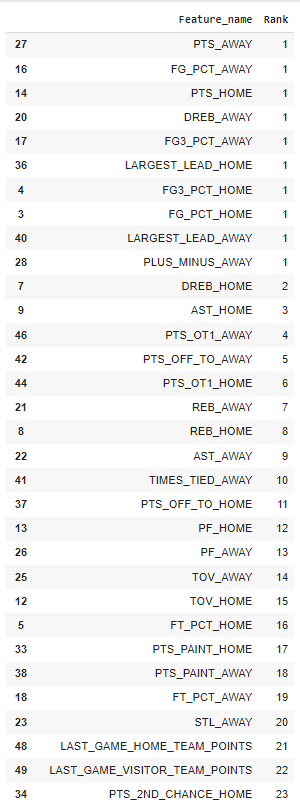

screenshot RFE loop 4 sur clf3

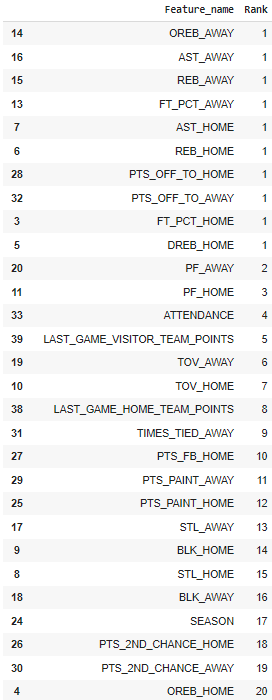

In [ ]:
# ['LAST_GAME_HOME_TEAM_NAME' 'LAST_GAME_VISITOR_TEAM_NAME' 'GAME_TIME'\n 'GAME_DATE' 'LAST_GAME_DATE_EST']

In [ ]:
# copie du df avant tests de festure engineering
df_bis=df.copy()

In [ ]:
#import datetime
#df_bis['GAME_DATE'] = pd.to_datetime(df_bis.GAME_DATE)
#df_bis['LAST_GAME_DATE_EST'] = pd.to_datetime(df_bis.LAST_GAME_DATE_EST)
#df_bis['TimeBtw2Games'] = df_bis['GAME_DATE'] - df_bis['LAST_GAME_DATE_EST']
#df_bis['TEAM_WINS_LOSSES_HOME'] = df_bis['TEAM_WINS_LOSSES_HOME'].astype('str')
#df_bis['TEAM_WINS_LOSSES_HOME'].isna() #OK pas de NAN
#df_bis['TEAM_WINS_LOSSES_HOME_VIC'] = df_bis['TEAM_WINS_LOSSES_HOME'].apply(lambda x : x.split('-')[0])
#df_bis['TEAM_WINS_LOSSES_HOME_DEF'] = df_bis['TEAM_WINS_LOSSES_HOME'].apply(lambda x : x.split('-')[-1])
#df_bis = df_bis.drop(['TEAM_WINS_LOSSES_HOME'], axis=1)
#df_bis['TEAM_WINS_LOSSES_AWAY'] = df_bis['TEAM_WINS_LOSSES_AWAY'].astype('str')
#df_bis['TEAM_WINS_LOSSES_AWAY_VIC'] = df_bis['TEAM_WINS_LOSSES_AWAY'].apply(lambda x : x.split('-')[0])
#df_bis['TEAM_WINS_LOSSES_AWAY_DEF'] = df_bis['TEAM_WINS_LOSSES_AWAY'].apply(lambda x : x.split('-')[-1])

In [ ]:
df_ter = df_bis.iloc[38500:,:] # choix arbitraire de selection des 20 dernières années

In [ ]:
df_ter.sample()

,SEASON_ID,TEAM_ID_HOME,WL_HOME,MIN_HOME,FG3_PCT_HOME,FT_PCT_HOME,OREB_HOME,DREB_HOME,REB_HOME,AST_HOME,STL_HOME,BLK_HOME,TOV_HOME,PF_HOME,TEAM_ID_AWAY,WL_AWAY,FG3_PCT_AWAY,FT_PCT_AWAY,OREB_AWAY,REB_AWAY,AST_AWAY,STL_AWAY,BLK_AWAY,TOV_AWAY,PF_AWAY,GAME_SEQUENCE,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,PTS_PAINT_HOME,PTS_2ND_CHANCE_HOME,PTS_FB_HOME,PTS_OFF_TO_HOME,PTS_PAINT_AWAY,PTS_2ND_CHANCE_AWAY,TIMES_TIED_AWAY,PTS_OFF_TO_AWAY,ATTENDANCE,PTS_QTR1_HOME,PTS_QTR2_HOME,PTS_OT1_HOME,PTS_OT4_HOME,PTS_QTR1_AWAY,PTS_QTR2_AWAY,PTS_OT1_AWAY,PTS_OT4_AWAY,LAST_GAME_HOME_TEAM_POINTS,LAST_GAME_VISITOR_TEAM_POINTS,PT_XYZ_AVAILABLE
50204,22010,1610612761,L,240,0.556,0.708,12.0,23.0,35.0,21.0,8.0,2.0,16.0,20.0,1610612757,W,0.412,0.76,9.0,32.0,23.0,10.0,8.0,16.0,15.0,5.0,1610612761,1610612757,2010,48.0,12.0,15.0,12.0,44.0,9.0,6.0,20.0,15625.0,19.0,28.0,0.0,0.0,23.0,32.0,0.0,0.0,84.0,97.0,0.0


In [ ]:
#plt.figure( figsize= (15, 15) )
#plt.subplot(121)
#plt.bar(df_ter['GAME_DATE'],df_ter['FG_PCT_AWAY'], label = "FG_PCT_AWAY")
#plt.yticks(range(0,2))
#plt.legend()
#plt.subplot(122)
#plt.bar(df_ter['GAME_DATE'],df_ter['FG_PCT_HOME'], color = ['#f7bf59'], label = "FG_PCT_HOME")
#plt.yticks(range(0,2))
#plt.legend()


In [ ]:
# recherche des NaN sur df_ter
df_ter.isna().sum()

SEASON_ID                          0
TEAM_ID_HOME                       0
WL_HOME                           40
MIN_HOME                           0
FG3_PCT_HOME                       0
FT_PCT_HOME                        0
OREB_HOME                          0
DREB_HOME                          0
REB_HOME                           0
AST_HOME                           0
STL_HOME                           0
BLK_HOME                           0
TOV_HOME                           0
PF_HOME                            0
TEAM_ID_AWAY                       0
WL_AWAY                           40
FG3_PCT_AWAY                       0
FT_PCT_AWAY                        0
OREB_AWAY                          0
REB_AWAY                           0
AST_AWAY                           0
STL_AWAY                           0
BLK_AWAY                           0
TOV_AWAY                           0
PF_AWAY                            0
GAME_SEQUENCE                      0
HOME_TEAM_ID                       0
V

In [ ]:
cols_with_missing = [col for col in df_ter.columns if df_ter[col].isna().any()]
len(cols_with_missing)

22

In [ ]:
# REMPLACEMENT DES VALEURS MANQUANTES NAN DE TYPE NUMERIC PAR LEUR MOYENNE
num_column2=[col for col in df_ter.columns if df_ter[col].dtype in ['int64','float64']]

In [ ]:
df_ter_num = df_ter[num_column2]

In [ ]:
column_means = df_ter_num. mean()

In [ ]:
for col in df_ter:
  df_ter_num = df_ter. fillna(column_means)

In [ ]:
df_ter_num.isna().sum()

SEASON_ID                         0
TEAM_ID_HOME                      0
WL_HOME                          40
MIN_HOME                          0
FG3_PCT_HOME                      0
FT_PCT_HOME                       0
OREB_HOME                         0
DREB_HOME                         0
REB_HOME                          0
AST_HOME                          0
STL_HOME                          0
BLK_HOME                          0
TOV_HOME                          0
PF_HOME                           0
TEAM_ID_AWAY                      0
WL_AWAY                          40
FG3_PCT_AWAY                      0
FT_PCT_AWAY                       0
OREB_AWAY                         0
REB_AWAY                          0
AST_AWAY                          0
STL_AWAY                          0
BLK_AWAY                          0
TOV_AWAY                          0
PF_AWAY                           0
GAME_SEQUENCE                     0
HOME_TEAM_ID                      0
VISITOR_TEAM_ID             

In [ ]:
# Nettoyage des lignes manquantes (données manquantes object)
df_ter_num = df_ter_num.dropna(axis=0)

In [ ]:
# SUPPRESSION DES VALEURS MANQUANTES NAN DE TYPE OBJECT PAR LEUR MODE
# [col for col in df_ter.columns if df_ter[col].dtype=='object']
# df_ter_obj = df_ter[object_column2]
# column_mode = df_ter_obj.mode()   # ABANDON PISTE MODE
# for col in df_ter_obj:
  #df_ter_obj = df_ter_obj.dropna(object_column2)

# Séparations en dataset tests et entrainement

In [ ]:
df_ter_num['WL_HOME'] = df_ter_num['WL_HOME'].replace(['W','L'],[1,0]) # ou df[].map

In [ ]:
df_ter_num['WL_AWAY']=df_ter_num['WL_AWAY'].replace(['W','L'],[1,0])

In [ ]:
df_ter_num.head()

,SEASON_ID,TEAM_ID_HOME,WL_HOME,MIN_HOME,FG3_PCT_HOME,FT_PCT_HOME,OREB_HOME,DREB_HOME,REB_HOME,AST_HOME,STL_HOME,BLK_HOME,TOV_HOME,PF_HOME,TEAM_ID_AWAY,WL_AWAY,FG3_PCT_AWAY,FT_PCT_AWAY,OREB_AWAY,REB_AWAY,AST_AWAY,STL_AWAY,BLK_AWAY,TOV_AWAY,PF_AWAY,GAME_SEQUENCE,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,PTS_PAINT_HOME,PTS_2ND_CHANCE_HOME,PTS_FB_HOME,PTS_OFF_TO_HOME,PTS_PAINT_AWAY,PTS_2ND_CHANCE_AWAY,TIMES_TIED_AWAY,PTS_OFF_TO_AWAY,ATTENDANCE,PTS_QTR1_HOME,PTS_QTR2_HOME,PTS_OT1_HOME,PTS_OT4_HOME,PTS_QTR1_AWAY,PTS_QTR2_AWAY,PTS_OT1_AWAY,PTS_OT4_AWAY,LAST_GAME_HOME_TEAM_POINTS,LAST_GAME_VISITOR_TEAM_POINTS,PT_XYZ_AVAILABLE
38500,22001,1610612741,1,240,0.308,0.750,4.0,37.0,41.0,25.0,14.0,5.0,13.0,27.0,1610612752,0,0.167,0.774,10.0,44.0,18.0,5.0,4.0,18.0,21.0,6.0,1610612741,1610612752,2001,32.0,11.0,10.0,7.0,32.0,10.0,4.0,17.0,18064.0,21.0,22.0,0.0,0.0,25.0,20.0,0.0,0.0,80.0,101.0,0.0
38501,22001,1610612757,0,240,0.300,0.783,7.0,30.0,37.0,16.0,1.0,3.0,10.0,23.0,1610612759,1,0.560,0.741,11.0,47.0,22.0,4.0,10.0,10.0,18.0,10.0,1610612757,1610612759,2001,24.0,7.0,7.0,14.0,26.0,13.0,0.0,11.0,19980.0,13.0,25.0,0.0,0.0,29.0,27.0,0.0,0.0,93.0,99.0,0.0
38502,22001,1610612760,0,240,0.286,0.737,10.0,19.0,29.0,21.0,11.0,5.0,20.0,30.0,1610612762,1,0.429,0.625,16.0,45.0,25.0,12.0,4.0,20.0,19.0,5.0,1610612760,1610612762,2001,30.0,10.0,3.0,26.0,54.0,19.0,2.0,16.0,15370.0,18.0,14.0,0.0,0.0,23.0,26.0,0.0,0.0,82.0,86.0,0.0
38503,22001,1610612749,1,240,0.353,0.912,9.0,37.0,46.0,24.0,7.0,5.0,12.0,19.0,1610612738,0,0.429,0.792,16.0,41.0,24.0,5.0,4.0,8.0,24.0,7.0,1610612749,1610612738,2001,26.0,14.0,4.0,14.0,28.0,18.0,7.0,11.0,18717.0,23.0,32.0,0.0,0.0,21.0,23.0,0.0,0.0,101.0,94.0,0.0
38504,22001,1610612739,0,240,0.273,0.788,15.0,35.0,50.0,14.0,3.0,5.0,17.0,22.0,1610612753,1,0.267,0.708,16.0,59.0,24.0,7.0,12.0,10.0,26.0,3.0,1610612739,1610612753,2001,12.0,7.0,6.0,13.0,56.0,20.0,0.0,5.0,16930.0,15.0,18.0,0.0,0.0,24.0,31.0,0.0,0.0,101.0,78.0,0.0


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve

In [ ]:
X=df_ter_num.drop(['WL_HOME','WL_AWAY'],axis=1) #"TimeBtw2Games"

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23908 entries, 38500 to 62447
Data columns (total 47 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   SEASON_ID                      23908 non-null  int64  
 1   TEAM_ID_HOME                   23908 non-null  int64  
 2   MIN_HOME                       23908 non-null  int64  
 3   FG3_PCT_HOME                   23908 non-null  float64
 4   FT_PCT_HOME                    23908 non-null  float64
 5   OREB_HOME                      23908 non-null  float64
 6   DREB_HOME                      23908 non-null  float64
 7   REB_HOME                       23908 non-null  float64
 8   AST_HOME                       23908 non-null  float64
 9   STL_HOME                       23908 non-null  float64
 10  BLK_HOME                       23908 non-null  float64
 11  TOV_HOME                       23908 non-null  float64
 12  PF_HOME                        23908 non-n

In [ ]:
y=df_ter_num['WL_HOME']
y.head()

38500    1
38501    0
38502    0
38503    1
38504    0
Name: WL_HOME, dtype: int64

In [ ]:
print('X_shape:',X.shape,'\n \n','y_shape:',y.shape)

X_shape: (23908, 47) 
 
 y_shape: (23908,)


In [ ]:
#xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=1/3, random_state=111, stratify = y)

In [ ]:
numeric_features = [col for col in X.columns if X[col].dtype in ['int64','float64']]
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_features = [col for col in X.columns if X[col].dtype =='object']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [ ]:
print(numeric_features)

['SEASON_ID', 'TEAM_ID_HOME', 'MIN_HOME', 'FG3_PCT_HOME', 'FT_PCT_HOME', 'OREB_HOME', 'DREB_HOME', 'REB_HOME', 'AST_HOME', 'STL_HOME', 'BLK_HOME', 'TOV_HOME', 'PF_HOME', 'TEAM_ID_AWAY', 'FG3_PCT_AWAY', 'FT_PCT_AWAY', 'OREB_AWAY', 'REB_AWAY', 'AST_AWAY', 'STL_AWAY', 'BLK_AWAY', 'TOV_AWAY', 'PF_AWAY', 'GAME_SEQUENCE', 'HOME_TEAM_ID', 'VISITOR_TEAM_ID', 'SEASON', 'PTS_PAINT_HOME', 'PTS_2ND_CHANCE_HOME', 'PTS_FB_HOME', 'PTS_OFF_TO_HOME', 'PTS_PAINT_AWAY', 'PTS_2ND_CHANCE_AWAY', 'TIMES_TIED_AWAY', 'PTS_OFF_TO_AWAY', 'ATTENDANCE', 'PTS_QTR1_HOME', 'PTS_QTR2_HOME', 'PTS_OT1_HOME', 'PTS_OT4_HOME', 'PTS_QTR1_AWAY', 'PTS_QTR2_AWAY', 'PTS_OT1_AWAY', 'PTS_OT4_AWAY', 'LAST_GAME_HOME_TEAM_POINTS', 'LAST_GAME_VISITOR_TEAM_POINTS', 'PT_XYZ_AVAILABLE']


In [ ]:
numeric_transformer

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True))],
         verbose=False)

In [ ]:
print(categorical_features)

[]


In [ ]:
print(len(numeric_features))

47


In [ ]:
print(len(categorical_features))

0


In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [ ]:
clf1 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=1, stratify = y)

clf1.fit(X_train, y_train)
print("model score: %.3f" % clf1.score(X_test, y_test))

model score: 0.921


In [ ]:
X_train.head()

,SEASON_ID,TEAM_ID_HOME,MIN_HOME,FG3_PCT_HOME,FT_PCT_HOME,OREB_HOME,DREB_HOME,REB_HOME,AST_HOME,STL_HOME,BLK_HOME,TOV_HOME,PF_HOME,TEAM_ID_AWAY,FG3_PCT_AWAY,FT_PCT_AWAY,OREB_AWAY,REB_AWAY,AST_AWAY,STL_AWAY,BLK_AWAY,TOV_AWAY,PF_AWAY,GAME_SEQUENCE,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,PTS_PAINT_HOME,PTS_2ND_CHANCE_HOME,PTS_FB_HOME,PTS_OFF_TO_HOME,PTS_PAINT_AWAY,PTS_2ND_CHANCE_AWAY,TIMES_TIED_AWAY,PTS_OFF_TO_AWAY,ATTENDANCE,PTS_QTR1_HOME,PTS_QTR2_HOME,PTS_OT1_HOME,PTS_OT4_HOME,PTS_QTR1_AWAY,PTS_QTR2_AWAY,PTS_OT1_AWAY,PTS_OT4_AWAY,LAST_GAME_HOME_TEAM_POINTS,LAST_GAME_VISITOR_TEAM_POINTS,PT_XYZ_AVAILABLE
50730,22011,1610612748,240,0.381,0.929,7.0,35.0,42.0,25.0,12.0,1.0,13.0,25.0,1610612754,0.263,0.769,9.0,36.0,12.0,7.0,3.0,23.0,26.0,5.0,1610612748,1610612754,2011,56.0,17.0,13.0,16.0,30.0,16.0,4.0,28.0,20201.0,29.0,33.0,0.0,0.0,27.0,12.0,0.0,0.0,110.0,103.0,0.0
46977,22008,1610612748,240,0.471,0.594,13.0,29.0,42.0,21.0,15.0,8.0,14.0,18.0,1610612758,0.105,0.850,10.0,42.0,10.0,7.0,2.0,26.0,23.0,3.0,1610612748,1610612758,2008,40.0,16.0,20.0,15.0,38.0,16.0,1.0,41.0,19600.0,22.0,27.0,0.0,0.0,14.0,17.0,0.0,0.0,109.0,120.0,0.0
46425,22007,1610612762,240,0.636,0.636,9.0,30.0,39.0,26.0,11.0,3.0,10.0,15.0,1610612740,0.556,0.696,9.0,39.0,17.0,6.0,4.0,19.0,24.0,6.0,1610612762,1610612740,2007,28.0,15.0,13.0,7.0,24.0,12.0,3.0,25.0,19911.0,21.0,29.0,0.0,0.0,20.0,19.0,0.0,0.0,99.0,71.0,0.0
53628,22013,1610612738,240,0.409,0.667,15.0,37.0,52.0,24.0,8.0,6.0,14.0,21.0,1610612758,0.333,0.917,15.0,47.0,17.0,3.0,5.0,10.0,15.0,5.0,1610612738,1610612758,2013,42.0,21.0,13.0,6.0,40.0,18.0,10.0,15.0,18624.0,21.0,28.0,0.0,0.0,29.0,17.0,0.0,0.0,99.0,81.0,1.0
59456,22018,1610612754,240,0.267,0.864,15.0,37.0,52.0,26.0,7.0,8.0,17.0,17.0,1610612758,0.281,0.800,12.0,43.0,24.0,9.0,8.0,14.0,21.0,2.0,1610612754,1610612758,2018,56.0,19.0,18.0,20.0,46.0,24.0,4.0,11.0,16867.0,24.0,30.0,0.0,0.0,31.0,21.0,0.0,0.0,110.0,111.0,1.0


In [ ]:
y_pred = clf1.predict(X_test)

In [ ]:
pred = clf1.predict_proba(X_test)[:,1]

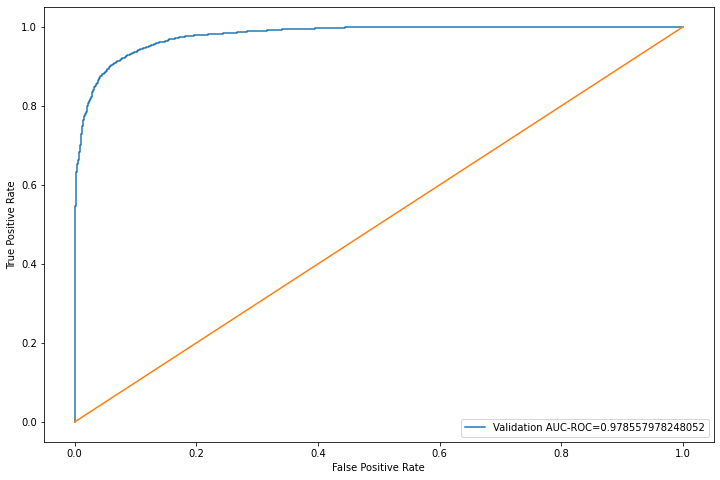

In [ ]:
fpr, tpr, _ = roc_curve(y_test,pred) 
auc = roc_auc_score(y_test, pred) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="Validation AUC-ROC="+str(auc)) 
x = np.linspace(0, 1, 1000)
plt.plot(x, x, linestyle='-')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

In [ ]:
# Confusion Matrix
pred_val = clf1.predict(X_test)

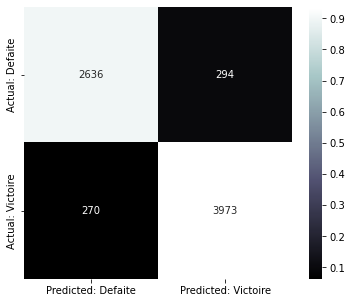

In [ ]:
label_preds = pred_val
cm = confusion_matrix(y_test,label_preds)

def plot_confusion_matrix(cm, normalized=True, cmap='bone'):
    plt.figure(figsize=[6, 5])
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm, annot=cm, fmt='g', xticklabels=['Predicted: Defaite','Predicted: Victoire'], yticklabels=['Actual: Defaite','Actual: Victoire'], cmap=cmap)

plot_confusion_matrix(cm, ['Defaite', 'Victoire'])

In [ ]:
##################################################
# reprise encodage en mode manuel pour vérif résultats du pipeline précédent

In [ ]:
y.head()

38500    1
38501    0
38502    0
38503    1
38504    0
Name: WL_HOME, dtype: int64

In [ ]:
X.head(1)

,SEASON_ID,TEAM_ID_HOME,MIN_HOME,FG3_PCT_HOME,FT_PCT_HOME,OREB_HOME,DREB_HOME,REB_HOME,AST_HOME,STL_HOME,BLK_HOME,TOV_HOME,PF_HOME,TEAM_ID_AWAY,FG3_PCT_AWAY,FT_PCT_AWAY,OREB_AWAY,REB_AWAY,AST_AWAY,STL_AWAY,BLK_AWAY,TOV_AWAY,PF_AWAY,GAME_SEQUENCE,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,PTS_PAINT_HOME,PTS_2ND_CHANCE_HOME,PTS_FB_HOME,PTS_OFF_TO_HOME,PTS_PAINT_AWAY,PTS_2ND_CHANCE_AWAY,TIMES_TIED_AWAY,PTS_OFF_TO_AWAY,ATTENDANCE,PTS_QTR1_HOME,PTS_QTR2_HOME,PTS_OT1_HOME,PTS_OT4_HOME,PTS_QTR1_AWAY,PTS_QTR2_AWAY,PTS_OT1_AWAY,PTS_OT4_AWAY,LAST_GAME_HOME_TEAM_POINTS,LAST_GAME_VISITOR_TEAM_POINTS,PT_XYZ_AVAILABLE
38500,22001,1610612741,240,0.308,0.75,4.0,37.0,41.0,25.0,14.0,5.0,13.0,27.0,1610612752,0.167,0.774,10.0,44.0,18.0,5.0,4.0,18.0,21.0,6.0,1610612741,1610612752,2001,32.0,11.0,10.0,7.0,32.0,10.0,4.0,17.0,18064.0,21.0,22.0,0.0,0.0,25.0,20.0,0.0,0.0,80.0,101.0,0.0


In [ ]:
X.columns

Index(['SEASON_ID', 'TEAM_ID_HOME', 'MIN_HOME', 'FG3_PCT_HOME', 'FT_PCT_HOME',
       'OREB_HOME', 'DREB_HOME', 'REB_HOME', 'AST_HOME', 'STL_HOME',
       'BLK_HOME', 'TOV_HOME', 'PF_HOME', 'TEAM_ID_AWAY', 'FG3_PCT_AWAY',
       'FT_PCT_AWAY', 'OREB_AWAY', 'REB_AWAY', 'AST_AWAY', 'STL_AWAY',
       'BLK_AWAY', 'TOV_AWAY', 'PF_AWAY', 'GAME_SEQUENCE', 'HOME_TEAM_ID',
       'VISITOR_TEAM_ID', 'SEASON', 'PTS_PAINT_HOME', 'PTS_2ND_CHANCE_HOME',
       'PTS_FB_HOME', 'PTS_OFF_TO_HOME', 'PTS_PAINT_AWAY',
       'PTS_2ND_CHANCE_AWAY', 'TIMES_TIED_AWAY', 'PTS_OFF_TO_AWAY',
       'ATTENDANCE', 'PTS_QTR1_HOME', 'PTS_QTR2_HOME', 'PTS_OT1_HOME',
       'PTS_OT4_HOME', 'PTS_QTR1_AWAY', 'PTS_QTR2_AWAY', 'PTS_OT1_AWAY',
       'PTS_OT4_AWAY', 'LAST_GAME_HOME_TEAM_POINTS',
       'LAST_GAME_VISITOR_TEAM_POINTS', 'PT_XYZ_AVAILABLE'],
      dtype='object')

In [ ]:
# Encodage One Hot des variables catégorielles du data frame data
#categorical_data = X.select_dtypes(exclude=["number"])
#categorical_data_enc = pd.get_dummies (categorical_data)
# verification du processus d'encodage one hot des variables catégorielles
#categorical_data_enc.head(5)
# Reconstitution de DATA à partir des données cat encodées ONE HOT et suppression des colonnes des données cat brutes
#X = pd.concat([X, categorical_data_enc], axis=1)

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.30, random_state=101)

In [ ]:
X.isna().sum()

SEASON_ID                        0
TEAM_ID_HOME                     0
MIN_HOME                         0
FG3_PCT_HOME                     0
FT_PCT_HOME                      0
OREB_HOME                        0
DREB_HOME                        0
REB_HOME                         0
AST_HOME                         0
STL_HOME                         0
BLK_HOME                         0
TOV_HOME                         0
PF_HOME                          0
TEAM_ID_AWAY                     0
FG3_PCT_AWAY                     0
FT_PCT_AWAY                      0
OREB_AWAY                        0
REB_AWAY                         0
AST_AWAY                         0
STL_AWAY                         0
BLK_AWAY                         0
TOV_AWAY                         0
PF_AWAY                          0
GAME_SEQUENCE                    0
HOME_TEAM_ID                     0
VISITOR_TEAM_ID                  0
SEASON                           0
PTS_PAINT_HOME                   0
PTS_2ND_CHANCE_HOME 

In [ ]:
# numeric_features = [col for col in X.columns if X[col].dtype in ['int64','float64']] # KO
# numeric_features  = df.select_dtypes(exclude=[object]) KO
#numeric_features = df.select_dtypes(include=[np.float64,np.int64]) KO
#numeric_features = df.select_dtypes(exclude='category')
#X_train2[numeric_features]
#sc = StandardScaler()
#X_train2[numeric_features] = sc.fit_transform(X_train2[numeric_features])
#X_test2[numeric_features] = sc.transform(X_test2[numeric_features])

In [ ]:
sc = StandardScaler()
X_train2 = sc.fit_transform(X_train2)
X_test2 = sc.transform(X_test2)

In [ ]:
clf2 = LogisticRegression()

In [ ]:
clf2.fit(X_train2, y_train2)
print("model score: %.3f" % clf2.score(X_test2, y_test2))

model score: 0.918


In [ ]:
pred2 = clf2.predict_proba(X_test2)[:,1]

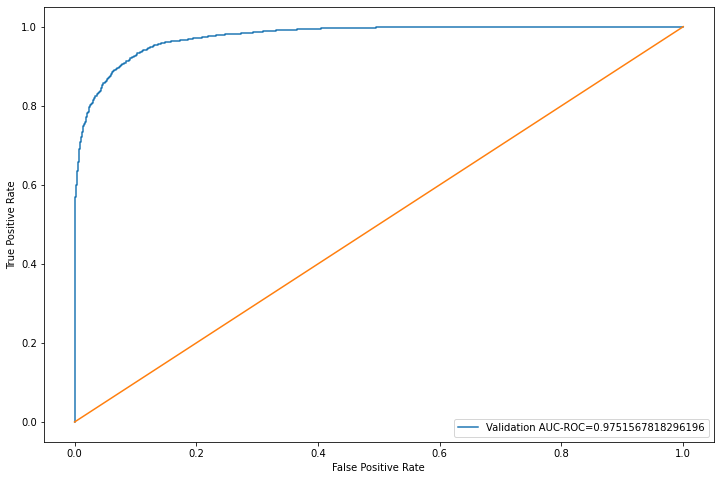

In [ ]:
fpr, tpr, _ = roc_curve(y_test2,pred2) 
auc = roc_auc_score(y_test2, pred2) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="Validation AUC-ROC="+str(auc)) 
x = np.linspace(0, 1, 1000)
plt.plot(x, x, linestyle='-')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

In [ ]:
# Confusion Matrix
pred_val2 = clf2.predict(X_test2)

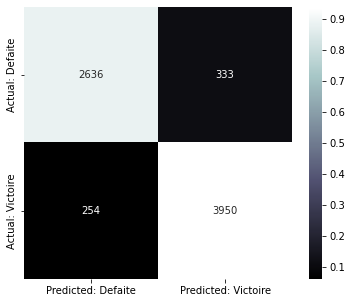

In [ ]:
label_preds2 = pred_val2
cm2 = confusion_matrix(y_test2,label_preds2)
plot_confusion_matrix(cm2, ['Defaite', 'Victoire'])

In [ ]:
# test d'un 3eme modèle

In [ ]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.30, random_state=101)

In [ ]:
from sklearn.preprocessing import MaxAbsScaler

In [ ]:
MA = MaxAbsScaler()
X_train3 = MA.fit_transform(X_train3)  #[numeric_features]
X_test3 = MA.transform(X_test3)  #[numeric_features]

In [ ]:
# Tests autres modèles
from sklearn.naive_bayes import ComplementNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
clf3 = RandomForestClassifier()
clf4 = DecisionTreeClassifier()

In [ ]:
clf3.fit(X_train3, y_train3)
print("model score: %.3f" % clf3.score(X_test3, y_test3))

model score: 0.858


In [ ]:
clf4.fit(X_train3, y_train3)
print("model score: %.3f" % clf4.score(X_test3, y_test3))

model score: 0.732


In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
# 2eme CALCUL SUR LOOP N°4
rfe = RFE(estimator=clf3, n_features_to_select=10, step=1)
rfe.fit(X, y)


RFE(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                     class_weight=None, criterion='gini',
                                     max_depth=None, max_features='auto',
                                     max_leaf_nodes=None, max_samples=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=100, n_jobs=None,
                                     oob_score=False, random_state=None,
                                     verbose=0, warm_start=False),
    n_features_to_select=10, step=1, verbose=0)

In [ ]:
rfe.ranking_

array([27, 38, 31,  1,  7, 26,  1,  3,  1, 19, 21, 12,  6, 35,  1,  8, 16,
        1,  1, 20, 23,  9,  4, 28, 36, 37, 25, 11, 22, 17,  1, 15, 24, 10,
        1, 14,  2,  5, 30, 34,  1,  1, 29, 33, 18, 13, 32])

In [ ]:
# 2eme CALCUL SUR LOOP N°4
ranking_df = pd.DataFrame()
ranking_df['Feature_name'] = X.columns
ranking_df['Rank'] = rfe.ranking_
ranked = ranking_df.sort_values(by=['Rank'])
ranked

,Feature_name,Rank
17,REB_AWAY,1
18,AST_AWAY,1
41,PTS_QTR2_AWAY,1
3,FG3_PCT_HOME,1
34,PTS_OFF_TO_AWAY,1
30,PTS_OFF_TO_HOME,1
6,DREB_HOME,1
14,FG3_PCT_AWAY,1
8,AST_HOME,1
40,PTS_QTR1_AWAY,1


Text(0, 0.5, 'RANK')

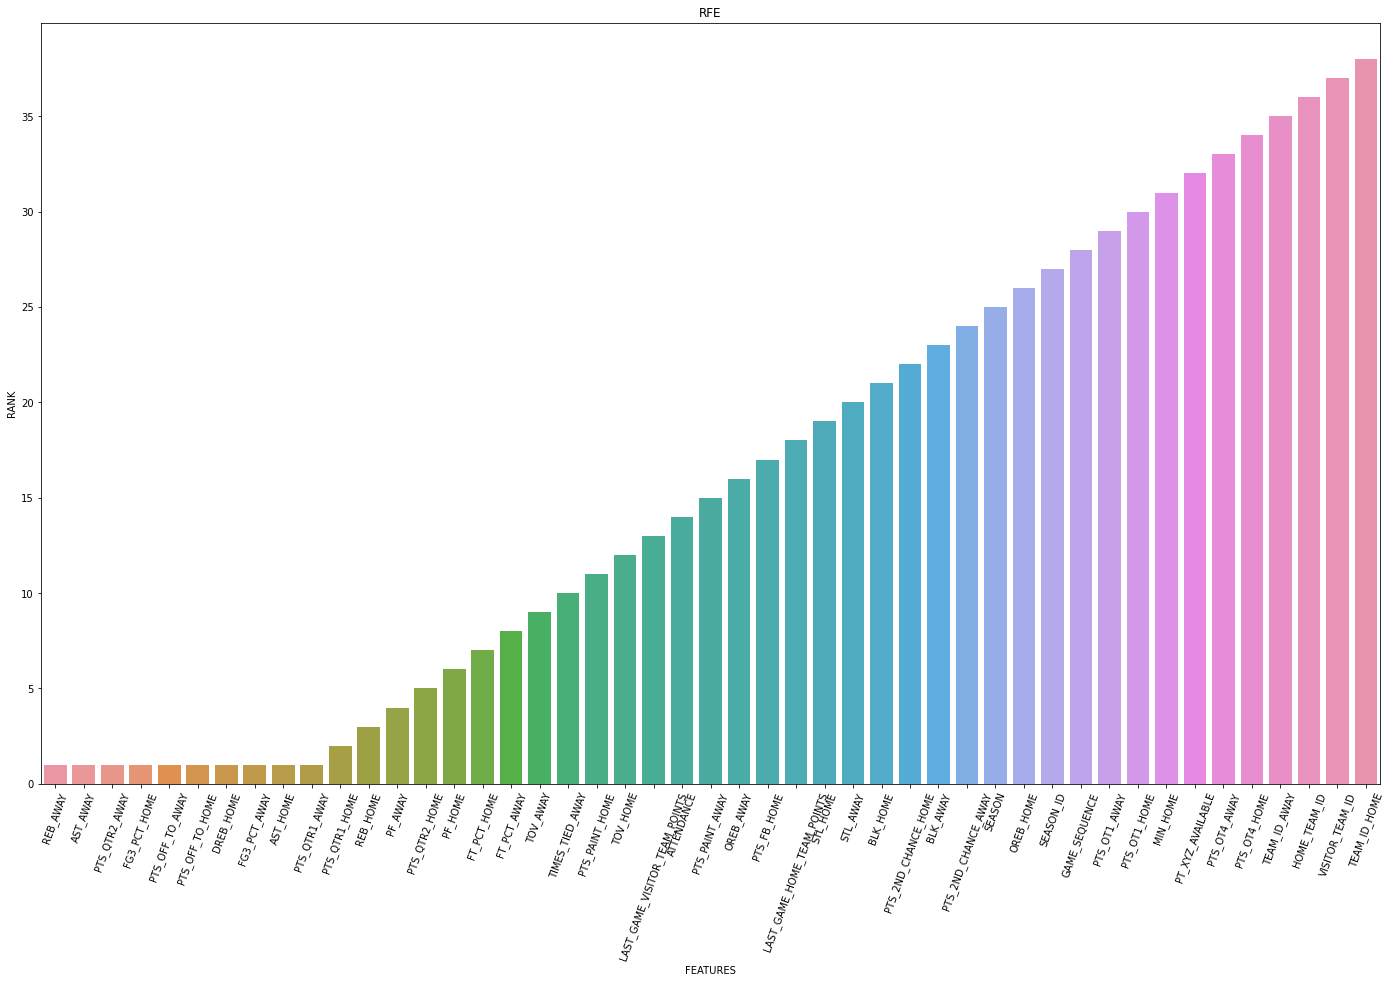

In [ ]:
plt.figure(figsize=(24, 14))
sns.barplot(x= ranked['Feature_name'], y= ranked['Rank'])
plt.title('RFE')
plt.xlabel('FEATURES')
plt.xticks(rotation=70)
plt.ylabel('RANK')

>2 0.624 (0.008)
>3 0.623 (0.012)
>4 0.656 (0.013)
>5 0.682 (0.018)
>6 0.700 (0.013)
>7 0.717 (0.011)
>8 0.732 (0.008)


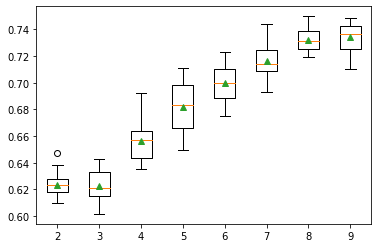

In [ ]:
# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(2, 10):
		rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
		model = DecisionTreeClassifier()
		models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 

X, y = X,y
models = get_models()
# evaluate the models 
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance 
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [ ]:
def get_models():
	models = dict()
	for i in range(2, 10):
		rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=i)
		model = RandomForestClassifier()
		models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 

X, y = X,y
models = get_models()
# evaluate the models 
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance 
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

>2 0.646 (0.009)
